In [1]:
import numpy as np
import matplotlib.pyplot as plt

import astropy
from astropy.io import fits
from astropy.table import Table

import itertools

import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

from astroML.linear_model import LinearRegression
from astroML.linear_model import PolynomialRegression

import warnings
warnings.filterwarnings("ignore")
import h5py

/usr/lib/python3/dist-packages/astroML/linear_model/linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


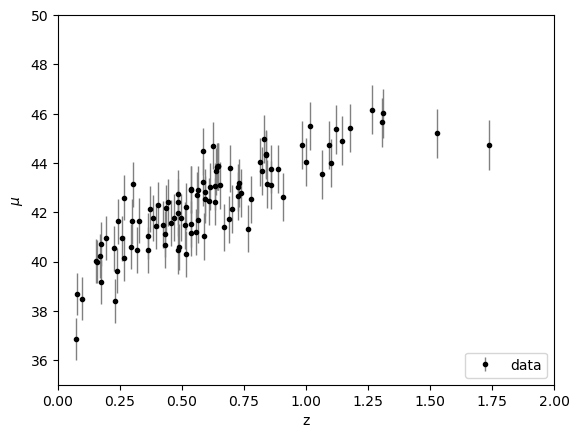

In [2]:
from astroML.datasets import generate_mu_z
z_sample, mu_sample, dmu = generate_mu_z(100, random_state=1234) # YOU CANNOT CHANGE THIS

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50);

In [3]:
#reshape of the data
z_sample=z_sample[:,np.newaxis]

In [4]:
#Linear regression
model = LinearRegression()
model.fit(z_sample, mu_sample, dmu)

x=np.linspace(0,2,1000)
x=x[:,np.newaxis]
print('Coefficients of model: ', model.coef_)
y_pred = model.predict(x)

Coefficients of model:  [39.48384602  4.76438865]


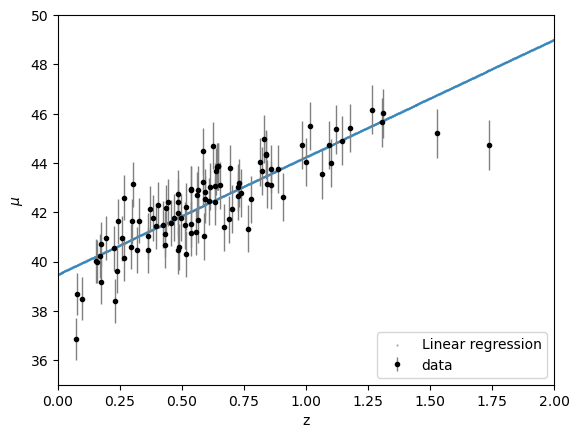

In [5]:
plt.scatter(x,y_pred, s=0.1, label='Linear regression')

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)
plt.show()

In [6]:
# Polynomial regression

degree=np.arange(1,11)
x_pol=np.linspace(0,2,1000)
x_pol=x_pol[:,np.newaxis]
y_pred_pol=[]

for d in degree:
    model = PolynomialRegression(d) # fit with different degrees
    model.fit(z_sample, mu_sample)
    
    y_pred_pol.append(model.predict(x_pol))

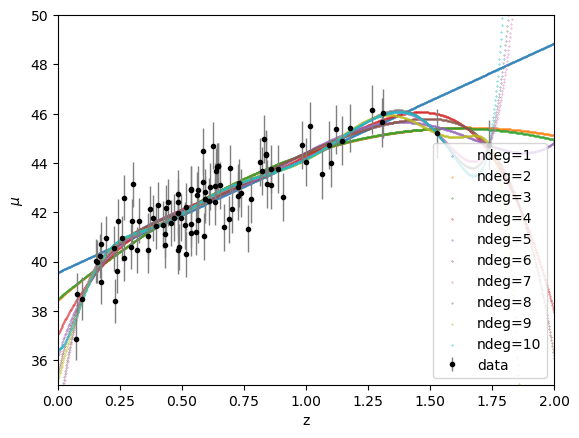

In [7]:
for i in range(len(degree)):
    plt.scatter(x,y_pred_pol[i], s=0.1, label='ndeg='+str(degree[i]))

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)
plt.show()

In [8]:
#underfit for 1-2
#overfit from 5 and more

In [9]:
#cross validation on n. degree

#dividing sample in training and test
x_c = z_sample[:,np.newaxis]
y_c = mu_sample
dy_c = dmu

x_train, x_validation, ydy_train, ydy_validation = train_test_split(x_c, np.array([y_c,dy_c]).T, test_size=0.3, random_state=42)
y_train,dy_train = ydy_train.T
y_validation,dy_validation = ydy_validation.T

#reshape of the data
x_train=(x_train.reshape(-1,1))
x_validation=(x_validation.reshape(-1,1))

Polynomial Regression n= 1 0.8238924629073953 1.0485115996674976
Polynomial Regression n= 2 0.8351995054159929 0.9385359114081159
Polynomial Regression n= 3 0.8354111725641497 0.9383899628086956
Polynomial Regression n= 4 0.8095703348999872 0.9024072712440709
Polynomial Regression n= 5 0.8143335829739126 0.8924469328124854
Polynomial Regression n= 6 0.8113859054713335 0.8905028171949827
Polynomial Regression n= 7 0.8163407910195624 0.8699559684825341
Polynomial Regression n= 8 0.8211204495356719 0.8695867558751573
Polynomial Regression n= 9 0.8218234526805027 0.8696086089168591
Polynomial Regression n= 10 0.8463777347597181 0.8666795023335886
Polynomial Regression n= 11 0.8513668728246152 0.8624581177637044
Polynomial Regression n= 12 0.8191597605773747 0.8558274202853656
Polynomial Regression n= 13 0.8247869246812073 0.8528955461686866
Polynomial Regression n= 14 0.8121593590225011 0.8407660029250767
Polynomial Regression n= 15 0.827191343750642 0.8383792859544169
Polynomial Regressio

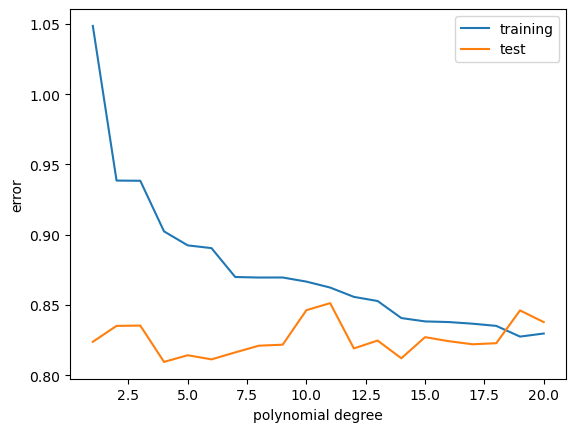

In [10]:
#evaluated degrees 
degree_cross = np.arange(1, 21)

training_err, test_err = [] , []

for d in (degree_cross):
    model_cross = PolynomialRegression(d) #model polynomial
    model_cross.fit(x_train, y_train, dy_train)

    #get errors for training and test
    tr_err=(np.sqrt (np.sum(( y_train - model_cross.predict(x_train))** 2) / len(x_train)))
    te_err=(np.sqrt (np.sum(( y_validation - model_cross.predict(x_validation))**2) / len(x_validation)))
    
    print("Polynomial Regression n=",d,te_err, tr_err)
    training_err.append(tr_err)
    test_err.append(te_err)

#plot errors as function of degrees
plt.plot(degree_cross, training_err, label='training')
plt.plot(degree_cross, test_err, label='test')

plt.xlabel('polynomial degree')
plt.ylabel('error')
plt.legend()
print("Best", degree_cross[np.argmin(test_err)], min(test_err))

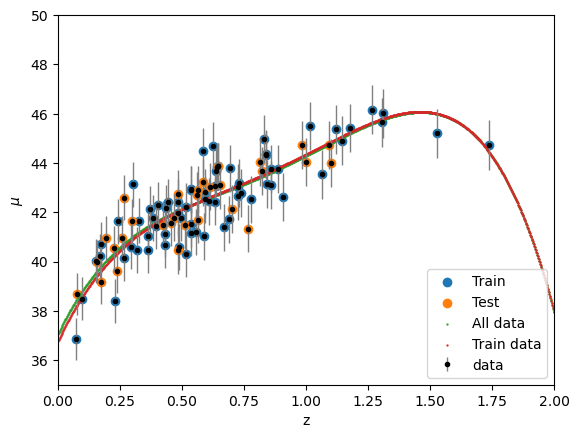

In [11]:
# Polynomial regression difference with all data and only train
x=np.linspace(0,2,1000)
x=x[:,np.newaxis]

model = PolynomialRegression(degree_cross[np.argmin(test_err)]) # fit best degree polynomial
model.fit(z_sample, mu_sample)
y_pol=model.predict(x)

plt.scatter(x_train,y_train, label='Train')
plt.scatter(x_validation,y_validation, label='Test')

plt.scatter(x, y_pol, s=0.4, label='All data')

model.fit(x_train, y_train)
y_t=model.predict(x)
plt.scatter(x, y_t, s=0.4, label='Train data')

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)
plt.show()